# Notebook used to manipulate some produced data

## Import of librairies

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

## Plots of game results

In [6]:
df = pd.read_csv('game_results.csv', sep=';', index_col=0)

In [ ]:
df['Scores'] = df['Scores'].apply(lambda x: [int(a) for a in x.replace('[', '').replace(']', '').replace(' ', '').split(',')])
df['mean_scores'] = df['Scores'].apply(lambda x: np.mean(x))

In [ ]:
df['Steps'] = df['Steps'].apply(lambda x: [int(a) for a in x.replace('[', '').replace(']', '').replace(' ', '').split(',')])

In [ ]:
df['mean_scores']

Pool id
0    -0.06
1     0.36
2     0.83
3     0.84
4     0.27
5     0.07
6     0.21
7     0.35
8     0.01
9     0.54
10    0.23
11    0.47
12    0.24
13    0.37
Name: mean_scores, dtype: float64

In [ ]:
df.head(2)

,Agent -1,Agent 1,Scores,Steps,mean_scores
Pool id,,,,,
0,Step Analyst Player 1 | False,Step Analyst Player 1 | True,"[1, 1, -1, 4, 2, -1, -4, -1, 7, -1, 1, -3, -1,...","[36, 35, 35, 36, 34, 37, 34, 36, 35, 35, 35, 3...",-0.06
1,Step Analyst Player 2 | False,Step Analyst Player 2 | True,"[-1, 3, -2, -2, 2, 1, 4, 4, -5, -1, 3, 1, 9, -...","[36, 37, 36, 34, 36, 35, 36, 36, 35, 37, 35, 3...",0.36


See pools tendencies

In [ ]:
sns.set_theme()
x_ticks = np.arange(-20, 22, 2)
y_ticks = np.arange(0, len(df['Scores']), 1)

fig = sns.violinplot(data=df['Scores'], palette="flare", inner="points", orient="h")
# Tendency of the mean score
z = np.polyfit(y_ticks, df['mean_scores'], 1)
p = np.poly1d(z)
fig.plot(p(y_ticks), y_ticks, c="green", ls=":", label="Tendency", linewidth=2)
fig.set(xlim=(-20, 20))
rect_p1=mpatches.Rectangle((0,-1),20,5, alpha=0.1,facecolor="red")
rect_m1=mpatches.Rectangle((-20,-1),20,5, alpha=0.1,facecolor="blue")

fig.set(title='Score distribution for each pool', xlabel='Scores', ylabel='Pool', xticks=x_ticks)
fig.set_xticklabels(x_ticks, rotation=45)
fig.text(10, -0.1, 'Player +1', fontsize = 10, color='red', ha='center')
fig.text(-10, -0.1, 'Player -1', fontsize = 10, color='blue', ha='center')
fig.add_line(plt.axvline(x=0, color='grey', linestyle='--'))
fig.add_patch(rect_p1)
fig.add_patch(rect_m1)

for row in df.iterrows():
    fig.text(-20, row[0]+0.2, str(row[1]['Agent -1']), color='grey', ha="left", fontsize=8)
    fig.text(20, row[0]+0.2, str(row[1]['Agent 1']), color='grey', ha="right", fontsize=8)

See step distribution for each pool

In [ ]:
sns.set_theme()
x_ticks = np.arange(20, 46, 2)
y_ticks = np.arange(0, len(df['Steps']), 1)

fig = sns.violinplot(data=df['Steps'], palette="flare", inner="points", orient="h")
fig.set(xlim=(20, 46))

fig.set(title='Step distribution for each pool', xlabel='Steps', ylabel='Pool', xticks=x_ticks)
fig.set_xticklabels(x_ticks, rotation=45)


See pool results

In [ ]:
df = pd.read_csv('pool_results.csv', sep=';', index_col=0)

In [ ]:

df['Cumulative_m1'] = df['Pct Agent -1'] * 100

df['Cumulative_draw'] = df['Pct Draw']*100 + df['Pct Agent -1']*100
df['Cumulative_p1'] = df['Cumulative_draw'] + df['Pct Agent 1']*100

bar_p1 = sns.barplot(x=df.index, y="Cumulative_p1", data=df, color='red')
bar_draw = sns.barplot(x=df.index, y="Cumulative_draw", data=df, color='orange')
bar_m1 = sns.barplot(x=df.index, y="Cumulative_m1", data=df, color='blue')


m1_bar = mpatches.Patch(color='blue', label='Agent -1')
draw_bar = mpatches.Patch(color='orange', label='Draw')
p1_bar = mpatches.Patch(color='red', label='Agent 1')

for row in df.iterrows():
    if row[1]['Pct Agent -1'] != 0:
        plt.text(row[0], 1,str(row[1]['Agent -1']), color='white', ha="center", fontsize=8)
        plt.text(row[0], row[1]['Cumulative_m1']/2, str(int(row[1]['Pct Agent -1']*100))+'%', color='white', ha="center", fontsize=9)
    if row[1]['Pct Draw'] != 0:
        plt.text(row[0], row[1]['Cumulative_m1']+1, 'Draw', color='white', ha="center", fontsize=8)
        plt.text(row[0], row[1]['Cumulative_m1']+row[1]['Pct Draw']*50, str(int(row[1]['Pct Draw']*100))+'%', color='white', ha="center", fontsize=9)
    if row[1]['Pct Agent 1'] != 0:
        plt.text(row[0], row[1]['Cumulative_draw']+1,str(row[1]['Agent 1']), color='white', ha="center", fontsize=8)
        plt.text(row[0], row[1]['Cumulative_draw']+row[1]['Pct Agent 1']*50, str(int(row[1]['Pct Agent 1']*100))+'%', color='white', ha="center", fontsize=9)


plt.ylim((0,100))
plt.title('Pourcentage of win for each agent in each pool')
plt.ylabel('Pourcentage')
plt.legend(handles=[m1_bar, draw_bar, p1_bar])
plt.show()


## Plot of genetics algorithm

In [ ]:
import json
params_df = {}
nb_gen = 14
nb_ind = 10
for gen in range(14):
    filename = f"../NN_MT2/gen{gen}.json"

    with open(filename) as f:
        listObj = json.load(f)
        for ind in range(10):
            for param in range(len(listObj['gen'][ind]['parameters'])):
                if param not in params_df:
                    params_df[param] = pd.DataFrame()
                params_df[param].loc[gen, ind] = listObj['gen'][ind]['parameters'][param]

In [ ]:
params_df[0]

(14, 10)

In [ ]:
params_df[0].iloc[0,:]

0   -0.058222
1   -0.579322
2   -0.215989
3    0.844692
4    0.259493
5   -0.255051
6   -0.758268
7   -0.883194
8    0.286370
9    0.820507
Name: 0, dtype: float64

See eventual parameter convergence

In [ ]:
param = 4

def plot_param_evolution(param, function_name=None):
    x_ticks = np.arange(0, nb_gen, 1)
    y_ticks = np.arange(-1, 1.1, 0.1)

    fig=plt.figure()
    ax=fig.add_subplot(111)


    var = params_df[param].var(axis=1)
    mean = params_df[param].mean(axis=1)
    for ind in range(nb_ind):
        ax.plot(params_df[param].index, params_df[param].iloc[:, ind], c='#666', linewidth=.5, label=None, fillstyle='none')

    ax.plot(params_df[param].index, var, c='#FA5', label=f"Diversity", fillstyle='none')
    ax.plot(params_df[param].index, mean, c='#3AD', linewidth=2, label=f"Mean value", fillstyle='none', marker="+", markersize=10)

    ax.set(title=f"Evolution of the parameter {param} {'used for '+function_name if function_name else ''}", xlabel='Generation', ylabel='Parameter value', xticks=x_ticks)
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.add_line(plt.axhline(y=0, color='grey', linestyle='--'))
    ax.set(ylim=(-1, 1))
    ax.set(xlim=(0, nb_gen-1))
    ax.text(nb_gen-1.1, mean[nb_gen-1], round(mean[nb_gen-1],2), fontsize = 15, color='darkblue', ha='right')
    plt.legend(loc='best')

In [ ]:
params_df[0].shape

(14, 10)

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages 
with PdfPages(f"test.pdf") as pdf:
        for a in range(5):
            fig = plot_param_evolution(a, 'ete')
            pdf.savefig(fig)

## See tendency of available actions count depending on current step

In [7]:
df = pd.read_csv('available_actions.csv', sep=',', header=None)

In [8]:
df = df[df[33] != 0]
df.shape

(233573, 51)

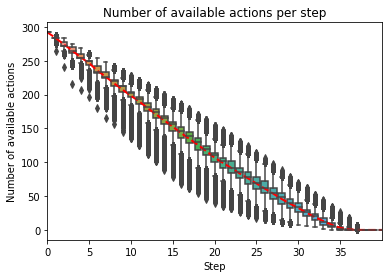

In [9]:
ax = sns.boxplot(data=df)
ax.plot(df.mean(axis=0), color='red', linewidth=2, label='Mean', linestyle='--')
ax.set_title("Number of available actions per step")
ax.set_xlabel("Step")
ax.set_xlim((0, 40))
ticks = np.arange(0, 40, 5)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks,)
_ = ax.set_ylabel("Number of available actions")

In [13]:
df_mean = pd.DataFrame({ 'mean': df.mean(axis=0), 'fac': np.ones(df.shape[1])})
df_mean

,mean
0,292.000000
1,283.588788
2,273.917687
3,264.835131
4,255.001323
5,246.467922
6,235.193374
7,226.218724
8,216.327546
9,207.179905


In [11]:
df_mean
for i in range(50):
    df_mean.loc[i, 'fac'] = 1
    for j in range(i, 50):
        df_mean.loc[i, 'fac'] *= df_mean.loc[j, 'mean'] if df_mean.loc[j, 'mean'] > 0 else 1
df_mean

,mean,fac
0,292.000000,3.379921e+69
1,283.588788,1.157507e+67
2,273.917687,4.081639e+64
3,264.835131,1.490097e+62
4,255.001323,5.626508e+59
5,246.467922,2.206462e+57
6,235.193374,8.952330e+54
7,226.218724,3.806370e+52
8,216.327546,1.682606e+50
9,207.179905,7.778048e+47


## See an eventual importance of step

Run ```python3 ./game.py --headless --no-gui -M -G 100 -P 40 --stats```
using two ```StepAnalystPlayer```

In [ ]:
df = pd.read_csv('game_results.csv', sep=';', index_col=0)
df['Scores'] = df['Scores'].apply(lambda x: [int(a) for a in x.replace('[', '').replace(']', '').replace(' ', '').split(',')])
df['mean_scores'] = df['Scores'].apply(lambda x: np.mean(x))
df.head()

,Agent -1,Agent 1,Scores,Steps,mean_scores
Pool id,,,,,
0,Step Analyst Player 0 | False,Step Analyst Player 0 | False,[-9],[35],-9.0
1,Step Analyst Player 0 | False,Step Analyst Player 0 | False,[3],[37],3.0
2,Step Analyst Player 0 | False,Step Analyst Player 0 | False,[1],[35],1.0
3,Step Analyst Player 0 | False,Step Analyst Player 0 | False,[3],[35],3.0
4,Step Analyst Player 0 | False,Step Analyst Player 0 | False,[-1],[32],-1.0


In [ ]:
witness = df.loc[0, 'mean_scores']
df['step'] = df.index
df['step_importance'] = df.apply(lambda x: abs(x['mean_scores'] - witness), axis=1)
m1_sum = df[df['step'] % 2 == 0]['step_importance'].sum()
p1_sum = df[df['step'] % 2 == 1]['step_importance'].sum()
df['step_importance'] = df.apply(lambda row: row['step_importance']/p1_sum if row['step'] % 2 == r else row['step_importance']/m1_sum, axis=1)

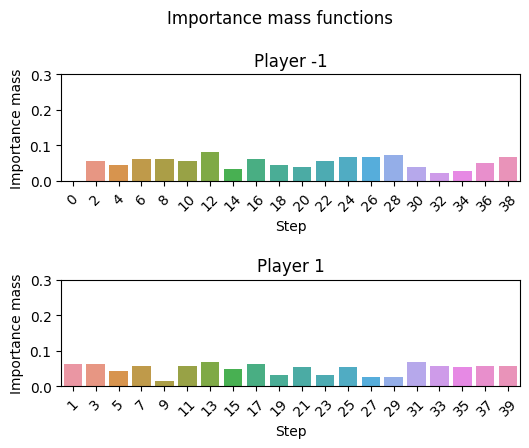

In [ ]:
from matplotlib.pyplot import subplot

fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=5.0)
fig.suptitle('Importance mass functions')

sns.barplot(ax=ax1, data=df[df['step'] % 2 == 0], x='step', y='step_importance')
ax1.set_title("Player -1")
ax1.set_xlabel("Step")
ax1.set_ylabel("Importance mass")
_ = ax1.set_xticklabels(np.arange(0, 40, 2), rotation=45)
_ = ax1.set_ylim((0, .3))

ax2 = sns.barplot(ax=ax2, data=df[df['step'] % 2 == 1], x='step', y='step_importance')
ax2.set_title("Player 1")
ax2.set_xlabel("Step")
ax2.set_ylabel("Importance mass")
_ = ax2.set_xticklabels(np.arange(1, 40, 2), rotation=45)
_ = ax2.set_ylim((0, .3))

In [ ]:
df['step_importance'].to_csv('step_importance.csv')

## Plot game history

Text(0.5, 1.0, ' Step 1 | Player -1 | Action (1, 2, 3, 5)')

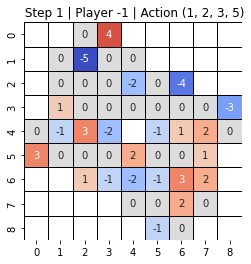

In [3]:
board = [ [ 0,  0,  1, -1,  0,  0,  0,  0,  0],
                      [ 0,  1, -1,  1, -1,  0,  0,  0,  0],
                      [ 0, -1,  1, -1,  1, -1,  1,  0,  0],
                      [ 0,  1, -1,  1, -1,  1, -1,  1, -1],
                      [ 1, -1,  1, -1,  0, -1,  1, -1,  1],
                      [-1,  1, -1,  1, -1,  1, -1,  1,  0],
                      [ 0,  0,  1, -1,  1, -1,  1, -1,  0],
                      [ 0,  0,  0,  0, -1,  1, -1,  1,  0],
                      [ 0,  0,  0,  0,  0, -1,  1,  0,  0] ]
b2 = [[0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, -5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -2, 0, -4, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, -3], [0, -1, 3, -2, 0, -1, 1, 2, 0], [3, 0, 0, 0, 2, 0, 0, 1, 0], [0, 0, 1, -1, -2, -1, 3, 2, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0]]
b3 = [[0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 2, 3, -1, -2, -1, 1, 0, 0], [0, 1, 0, 0, 2, 0, 0, 0, 3], [0, 2, 1, -1, 0, -2, 3, -1, 0], [-3, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -4, 0, -2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, -5, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0]]
mask = np.array([ [ True,  True,  False, False,  True,  True,  True,  True,  True],
                      [ True,  False, False,  False, False,  True,  True,  True,  True],
                      [ True, False,  False, False,  False, False,  False,  True,  True],
                      [ True,  False, False,  False, False,  False, False,  False, False],
                      [ False, False,  False, False,  True, False,  False, False,  False],
                      [False,  False, False,  False, False,  False, False,  False,  True],
                      [ True,  True,  False, False,  False, False,  False, False,  True],
                      [ True,  True,  True,  True, False,  False, False,  False,  True],
                      [ True,  True,  True,  True,  True, False,  False,  True,  True] ])

#
fig = sns.heatmap(b2, annot=True, cmap='coolwarm', cbar=False, linewidths=1, linecolor='black', square=True, mask=mask, vmin=-5, vmax=5)

fig.set_title(" Step 1 | Player -1 | Action (1, 2, 3, 5)")

In [ ]:
fig = sns.heatmap(b3, annot=True, cmap='coolwarm', cbar=False, linewidths=1, linecolor='black', square=True, mask=mask, vmin=-5, vmax=5)

## Temps d'execution IDS

In [18]:
data = pd.read_csv('time.csv')

In [19]:
import statistics
dic = {}

for k in data["step"].unique():
    dic[k] = {"2-3":[], "3-4":[], "4-5":[], "5-6":[], "6-7":[], "7-8":[]}

last_depth = -1
last_step = -1
last_time = -1
for i, row in data.iterrows():
    if row["step"] == last_step and last_depth+1 == row["depth"]:
        dic[row["step"]][str(int(last_depth)) + "-" + str(int(row["depth"]))].append(row["time"] / last_time)
    last_depth = row["depth"]
    last_step = row["step"]
    last_time = row["time"]
k = 20
dicString = ""
print(sorted(dic.keys()))
for k in sorted(dic.keys()):
    dicString += str(k)+":{"
    for kk in dic[k].keys():
    #kk = "3-4"
        if(not len(dic[k][kk]) == 0):
            #dicString += str(kk[0])+":"+str(round(statistics.mean(dic[k][kk]),2))+","
            # get third decile
            dicString += str(kk[0])+":"+str(round(sorted(dic[k][kk])[int(len(dic[k][kk])/4)],2))+","
            #print("step",k,"rapport",kk,round(statistics.median(dic[k][kk]),2),"(",len(dic[k][kk]),")")
    #remove last char
    dicString = dicString[:-1]
    dicString += "},"
print(dicString[:-1])
        #print("step",k,"rapport",kk,"min",round(min(dic[k][kk]),2),"med",round(statistics.median(dic[k][kk]),2),"max",round(max(dic[k][kk]),2))


KeyError: '8-9'

<AxesSubplot:xlabel='step', ylabel='time'>

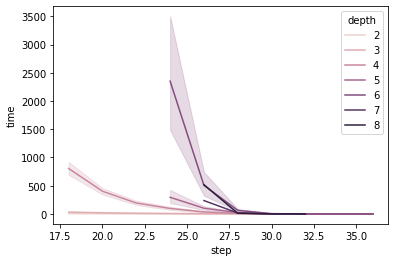

In [11]:
sns.lineplot(data=data, x='step', y='time', hue='depth')

In [20]:
median_depth2 = data[data.depth==2].groupby('step').max()
median_depth3 = data[data.depth==3].groupby('step').min()
median_depth4 = data[data.depth==4].groupby('step').min()
median_depth5 = data[data.depth==5].groupby('step').min()
median_depth6 = data[data.depth==6].groupby('step').min()
median_depth3['time'] / median_depth2['time']


step
18    1.487534
20    1.346654
22    1.189176
24    0.984612
26    1.051225
28    1.077959
30    0.337284
32    0.017629
34    0.030576
36    0.499464
Name: time, dtype: float64

In [14]:
median_depth4['time'] / median_depth3['time']

step
18    19.224857
20    20.487513
22    14.718570
24    10.489011
26     7.422821
28     5.053909
30     3.014024
32     0.850363
34     0.704888
36     1.399045
Name: time, dtype: float64

In [8]:
median_depth5['time'] / median_depth4['time']

step
18         NaN
20         NaN
22         NaN
24    2.497136
26    2.563523
28    2.924950
30    1.556318
32    0.988104
34    1.820905
36    1.119581
Name: time, dtype: float64

In [9]:
median_depth6['time'] / median_depth5['time']

step
24    9.513879
26    4.022609
28    2.042814
30    1.065891
32    0.995985
34    0.821233
36    1.170426
Name: time, dtype: float64

In [22]:
data[data.depth==2].groupby('step').count()

,depth,time
step,,
18,19,19
20,15,15
22,14,14
24,14,14
26,14,14
28,14,14
30,14,14
32,14,14
34,9,9
